In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
rt_table = pd.read_csv("demo_data_processed.csv")

In [192]:
df1 = pd.read_csv("demo_data.csv")

In [143]:
df1 = df1.drop(["Unnamed: 0"], axis = 1)

In [144]:
#df1.to_csv("demo_data.csv", index = False)

In [263]:
df2 = df1.copy()

In [264]:
df2.head()

,group,target,normalizer
0,no_treatment,25.60,17.5
1,no_treatment,25.80,16.9
2,no_treatment,26.00,17.4
3,no_treatment,25.40,17.7
4,no_treatment,25.45,17.2


In [265]:
df2.group = df2.group.replace("no_treatment", "control")

In [266]:
df3 = df2[df2.group == "treatment"]

In [267]:
df3.target = df3.target * 1.03

/Users/patricklong/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [268]:
df3

,group,target,normalizer
10,treatment,25.94982,17.9
11,treatment,26.15994,17.3
12,treatment,25.02900,17.4
13,treatment,25.23500,17.3
14,treatment,25.44100,17.9
15,treatment,25.64700,17.3
16,treatment,25.73970,17.3
17,treatment,25.52958,17.4


In [269]:
df3.normalizer = df3.normalizer * 1.005

/Users/patricklong/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [270]:
df3.group = df3.group.replace("treatment", "trt_b") 

In [271]:
df3

,group,target,normalizer
10,trt_b,25.94982,17.9895
11,trt_b,26.15994,17.3865
12,trt_b,25.02900,17.4870
13,trt_b,25.23500,17.3865
14,trt_b,25.44100,17.9895
15,trt_b,25.64700,17.3865
16,trt_b,25.73970,17.3865
17,trt_b,25.52958,17.4870


In [272]:
df2.group = df2.group.replace("treatment", "trt_a") 

In [273]:
df4 = pd.concat([df2, df3], axis = 0)

In [303]:
df4.groupby(["group"])["egf1r"].mean()

group
control    25.90650
trt_a      24.84600
trt_b      25.59138
Name: egf1r, dtype: float64

In [304]:
df4.groupby(["group"])["rpl19"].mean()

group
control    17.340000
trt_a      17.475000
trt_b      17.562375
Name: rpl19, dtype: float64

In [281]:
df4 = pd.read_csv("demo_data_extended.csv")

In [284]:
df4.rename(columns = {"target": "egf1r", "normalizer": "rpl19" }, inplace = True)

In [286]:
df4.to_csv("demo_data_extended.csv", index = False)

In [288]:
df5 = pd.read_csv("demo_data_extended_processed.csv")

In [298]:
print(df5.sample(10).sort_values(by = "group").to_markdown())

|    | group   |   rpl19 |   egf1r |   delta_ct |   delta_delta_ct |   fold_change |
|---:|:--------|--------:|--------:|-----------:|-----------------:|--------------:|
|  3 | control | 17.7    | 25.4    |    7.7     |         -0.8665  |      1.82323  |
|  8 | control | 16.9    | 26.316  |    9.416   |          0.8495  |      0.554977 |
|  7 | control | 17.5    | 26.112  |    8.612   |          0.0455  |      0.968954 |
| 11 | trt_a   | 17.3    | 25.398  |    8.098   |         -0.4685  |      1.38367  |
| 15 | trt_a   | 17.3    | 24.9    |    7.6     |         -0.9665  |      1.95409  |
| 18 | trt_b   | 17.9895 | 25.9498 |    7.96032 |         -0.60618 |      1.52222  |
| 23 | trt_b   | 17.3865 | 25.647  |    8.2605  |         -0.306   |      1.23628  |
| 19 | trt_b   | 17.3865 | 26.1599 |    8.77344 |          0.20694 |      0.866373 |
| 24 | trt_b   | 17.3865 | 25.7397 |    8.3532  |         -0.2133  |      1.15934  |
| 25 | trt_b   | 17.487  | 25.5296 |    8.04258 |         -0.5239

In [290]:
rt_table = df5

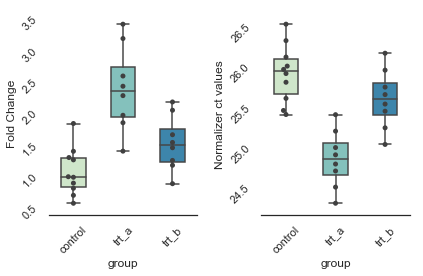

In [292]:
f, axes = plt.subplots(1, 2)
sns.set(style = "white")
plt.xticks(rotation=45)
sns.boxplot(x = "group",
              y =  "fold_change",                                                                                                                                         
              data = rt_table,
           ax=axes[0], width=.5, palette='GnBu')

sns.boxplot(x = "group",
              y =  "egf1r",                                                                                                                                         
              data = rt_table,
           ax=axes[1], width=.5, palette='GnBu')

sns.swarmplot(x = "group",
              y =  "fold_change",                                                                                                                                         
              data = rt_table,
           ax=axes[0], color=".25")

sns.swarmplot(x = "group",
              y =  "egf1r",                                                                                                                                         
              data = rt_table,
           ax=axes[1], color=".25")

plt.tight_layout()
sns.despine(left=True)
axes[0].set_ylabel('Fold Change')
axes[1].set_ylabel('Normalizer ct values')
axes[0].tick_params(labelrotation=45)
axes[1].tick_params(labelrotation=45)


f.savefig("test.png", dpi=300, bbox_inches="tight")

In [ ]:
def visualize_rt(df):
    """Visualization fold change in target gene expression"""

    #output = self.output_path +  ".png"
    #logger.info(f"Saving output figure: {output}")
    sns.set(style = "white")
    sns.boxplot(x = "group",
              y =  "fold_change",                                                                                                                                         
              data = self.rt_table)
    
    return figz
    #plt.savefig(output, dpi=300)